## Calculate Statistics for CRP Cities

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import datetime
import geocoder
import os
import geopandas as gpd
from glob import *
import numpy as np
import pylab as pl
%pylab inline
%matplotlib inline
ox.config(log_console=True, use_cache=True)

Populating the interactive namespace from numpy and matplotlib


## Stats Plots for CRP Cities

### The function below calculates the average betweenness centrality for the indiidual cities and creates plots for benchmarking and comaprison with other cities.

In [21]:
def get_bc_plots(place):
    extended_path_lis = glob('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/*/Extended_*.csv')
    
    dic = {}
    
    for i in extended_path_lis[1:]:
        d = pd.read_csv(i)
        d.betweenness_centrality_avg = d.betweenness_centrality_avg*100
        city = i.split('/')[-2]
        dic[city] = d.betweenness_centrality_avg[0]
        
    avg = np.average(list(dic.values()))
    
    new = []
    two = []
    for w in sorted(dic, key=dic.get, reverse=False):
         new.append(w), two.append(dic[w])
    
    string = place.split(',')[0]
    
    q = avg/2
    
    fig = pl.figure(figsize=(6,4))
    pl.plot( new,two,  'bo')
    pl.xticks('')

    pl.axhline(y=avg, color='orange', linestyle='-')
    pl.plot( '{}'.format(string),dic['{}'.format(string)], 'ro')

    
    x = np.arange(16)
    y = [0.13 for i in range(16)]
    pl.plot(x, y , alpha=0)
    pl.axvline(x=4, color='coral', alpha=0.5, linestyle='-.')
    pl.axvline(x=8, color='coral', alpha=0.5, linestyle='-.')
    pl.axvline(x=12, color='coral', alpha=0.5, linestyle='-.')
    pl.text(0.1, 10, '1st Quartile')
    pl.text(4.1, 10, '2nd Quartile')
    pl.text(8.1, 10, '3rd Quartile')
    pl.text(12.1, 10, '4th Quartile')
    
    pl.title('Criticality Score (average for entire network)'.format(place))
    
    fig.savefig('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/{}_avgbc_plot.png'.format(string, string))

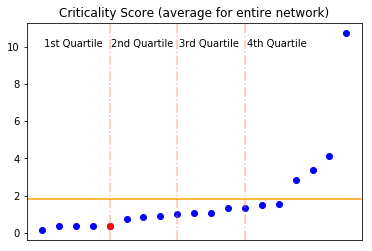

In [22]:
get_bc_plots('Tashkent, Uzabekistan')

In [2]:
city_scan_list = [
    'El Nido, Philippines',
    'Tashkent, Uzbekistan',
    'Montevideo, Uruguay',
    'Monrovia, Liberia',
    'Sfax, Tunisia',
    'Lima, Peru',
    'Penang, Malaysia',
    'Cotonou, Benin',
    'Osh,  Kyrgyzstan',
    'Maputo, Mozambique',
    'Batroun, Lebanon',
    'Davao City, Philippines',
    'Vinh Long, Vietnam',
    'Sousse, Tunisia',
    'Khanh Hoa, Vietnam',
    'St. Louis, Senegal',
    'Coron, Philippines',
    'Joub Jannine, Lebanon',
    'Cap-Haitien, Haiti',
    'El Nido, Philippines',
'Coron, Philippines',
'Puerto Princesa, Philippines'
]


CPU times: user 636 ms, sys: 36 ms, total: 672 ms
Wall time: 711 ms
CPU times: user 644 ms, sys: 36 ms, total: 680 ms
Wall time: 701 ms
CPU times: user 664 ms, sys: 32 ms, total: 696 ms
Wall time: 734 ms
CPU times: user 652 ms, sys: 32 ms, total: 684 ms
Wall time: 707 ms
CPU times: user 620 ms, sys: 36 ms, total: 656 ms
Wall time: 686 ms
CPU times: user 656 ms, sys: 8 ms, total: 664 ms
Wall time: 701 ms
CPU times: user 644 ms, sys: 24 ms, total: 668 ms
Wall time: 700 ms
CPU times: user 628 ms, sys: 32 ms, total: 660 ms
Wall time: 701 ms
CPU times: user 644 ms, sys: 20 ms, total: 664 ms
Wall time: 685 ms
CPU times: user 632 ms, sys: 32 ms, total: 664 ms
Wall time: 705 ms
CPU times: user 640 ms, sys: 16 ms, total: 656 ms
Wall time: 679 ms
CPU times: user 616 ms, sys: 44 ms, total: 660 ms
Wall time: 685 ms
CPU times: user 632 ms, sys: 28 ms, total: 660 ms
Wall time: 694 ms
CPU times: user 632 ms, sys: 28 ms, total: 660 ms
Wall time: 677 ms
CPU times: user 624 ms, sys: 48 ms, total: 672 ms

KeyError: 'Puerto Princesa'

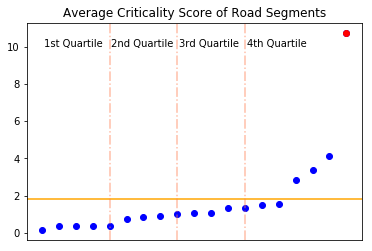

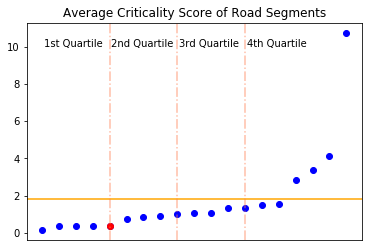

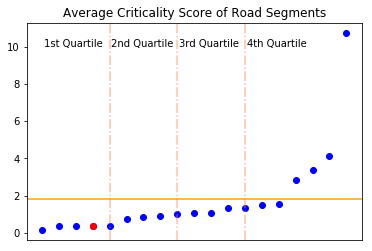

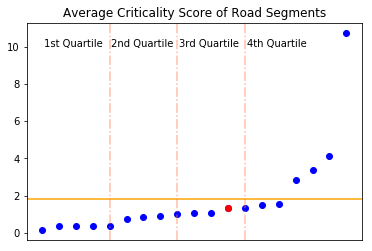

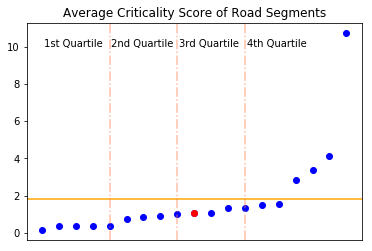

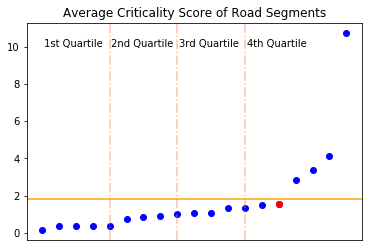

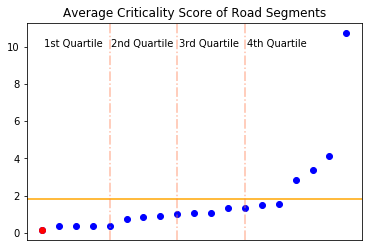

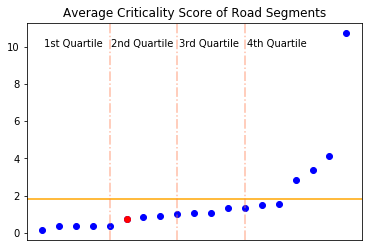

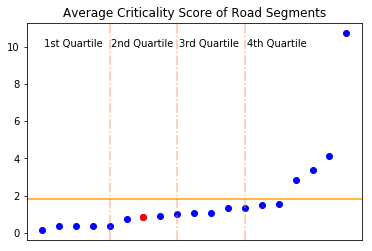

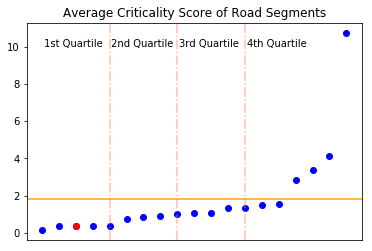

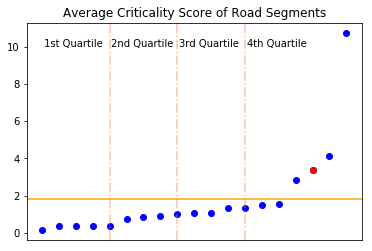

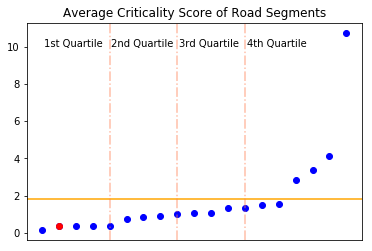

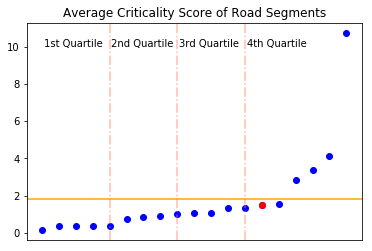

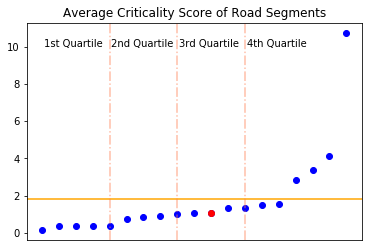

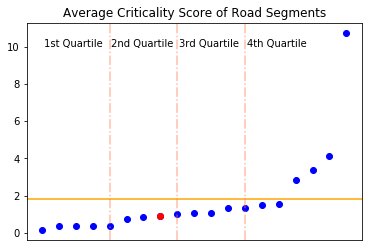

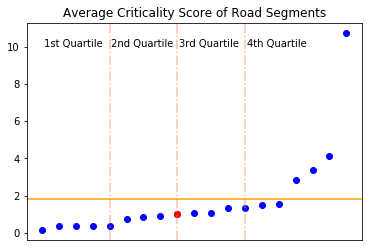

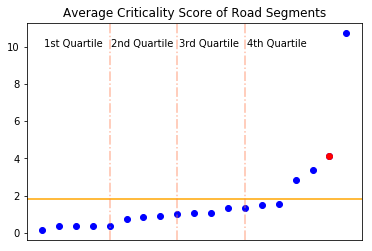

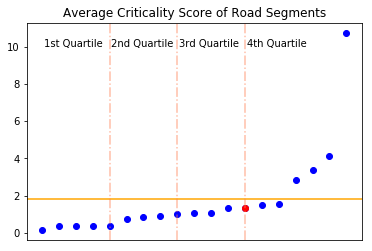

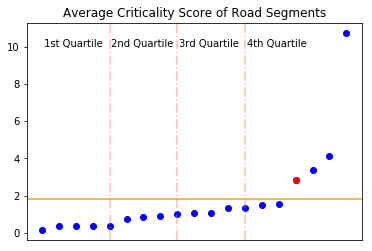

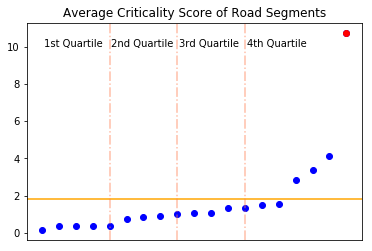

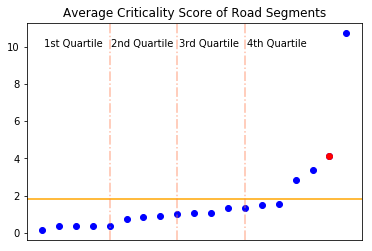

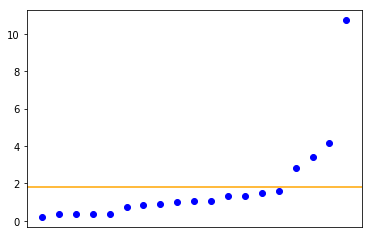

In [87]:
for i in city_scan_list:
    %time get_bc_plots(i)

### The function below calculates the maximum betweenness centrality for each of the cities. The node that represents this value is the most crucial intersection in the city and disruption of this node could create major issues to accessibility.

In [4]:
def get_maxbc_plots(place):
    
    string = place.split(',')[0]
    extended_path_lis = glob('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/*/Extended_*.csv')
    
    max_d = {}
    for i in extended_path_lis[1:]:
        d = pd.read_csv(i)
        d.betweenness_centrality = d.betweenness_centrality*100
        city = i.split('/')[-2]
        max_d[city] = max(d.betweenness_centrality)
        
    avg_max = np.average(list(max_d.values()))
    
    max_name = []
    max_val = []
    for w in sorted(max_d, key=max_d.get, reverse=False):
         max_name.append(w), max_val.append(max_d[w])
    
    fig = pl.figure(figsize=(6,4))
    ax = pl.plot( max_name,max_val, 'bo')
    pl.xticks('')
    pl.axhline(y=avg_max, color='orange', linestyle='-')
    #pl.ylabel('Maximum Betweenness Centrality', fontsize=12)
    #pl.text(x='Tashkent', y=avg_max+0.001, s='Average: {0:.3f}'.format(avg_max))
    #pl.xticks(rotation=60, fontsize=12)
    pl.plot( '{}'.format(string),max_d['{}'.format(string)], 'ro')
    #pl.text(x='{}'.format(string), y=max_d['{}'.format(string)]+0.001, s='{0:.3f}'.format(max_d['{}'.format(string)]))
    
    print(string, max_d['{}'.format(string)])
    
    x = np.arange(16)
    y = [0.7 for i in range(16)]
    pl.plot(x, y , alpha=0)
    pl.axvline(x=4, color='coral', alpha=0.5, linestyle='-.')
    pl.axvline(x=8, color='coral', alpha=0.5, linestyle='-.')
    pl.axvline(x=12, color='coral', alpha=0.5, linestyle='-.')
    pl.text(0.1, 50, '1st Quartile')
    pl.text(4.1, 50, '2nd Quartile')
    pl.text(8.1, 50, '3rd Quartile')
    pl.text(12.1, 50, '4th Quartile')
    
    pl.title('Disruption potential due to most critical node \n percent shortest journeys passing through most critical node'.format(place))
    
    fig.savefig('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/{}_maxbc_plot.png'.format(string, string))

Montevideo 11.891024764554006


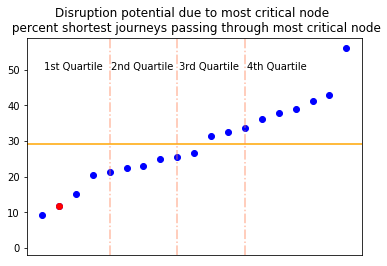

In [6]:
get_maxbc_plots('Montevideo, Uruguay')

El Nido 33.775510204081634
Tashkent 9.359724081483813
Montevideo 11.891024764554006
Monrovia 26.67155487732828
Sfax 15.140292199388247
Lima 20.44777345927417
Penang 21.18881340823004
Cotonou 22.320183868024877
Osh 22.90900340966209
Maputo 25.059892584902972
Batroun 25.51945036245382
Davao City 31.501891331748105
Vinh Long 32.610501653537405
Sousse 36.247359646904606
Khanh Hoa 37.83961058845881
St. Louis 38.96683790037019
Coron 41.243143245486806
Joub Jannine 42.976849171234974
Cap-Haitien 56.22247743707764
El Nido 33.775510204081634


/nfshome/gb1877/.conda/envs/osmpython/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Coron 41.243143245486806


KeyError: 'Puerto Princesa'

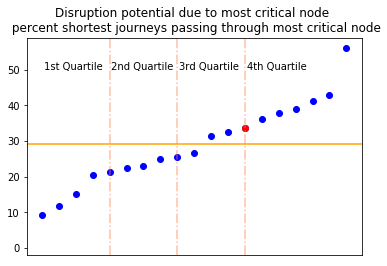

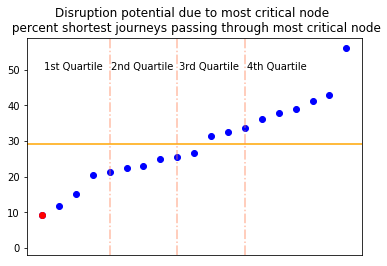

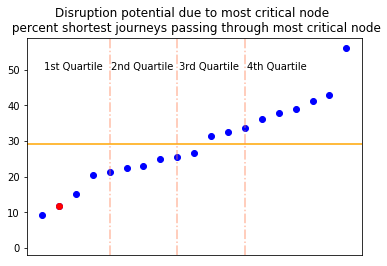

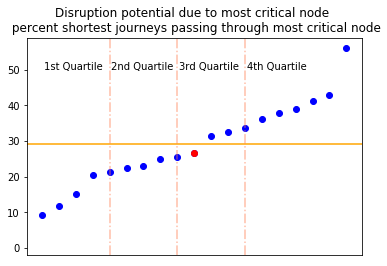

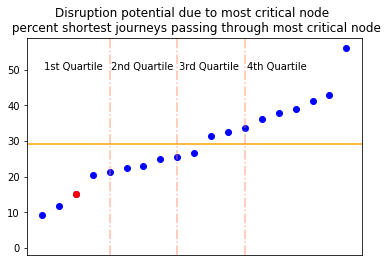

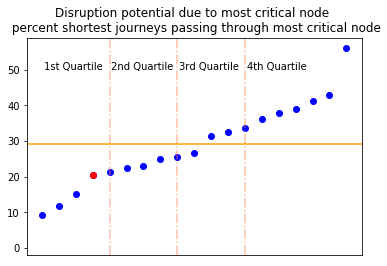

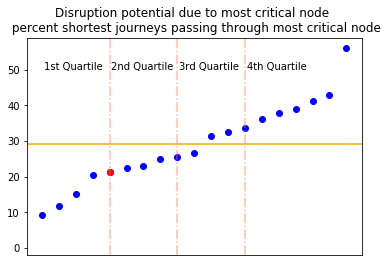

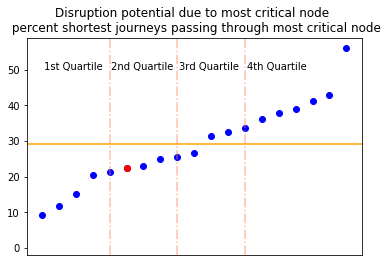

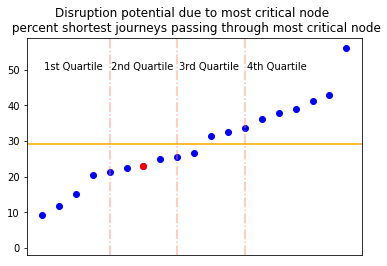

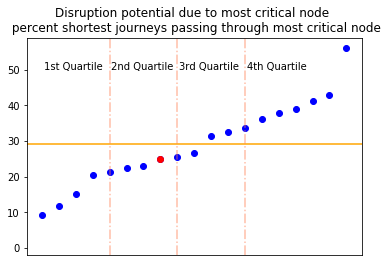

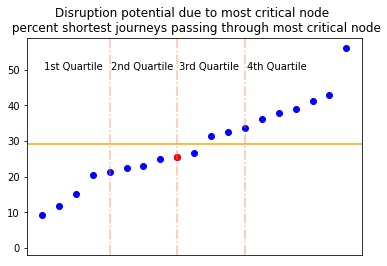

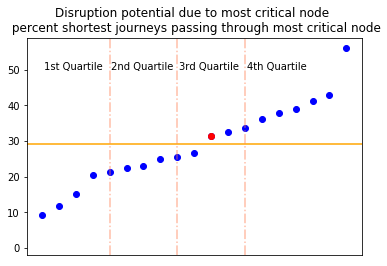

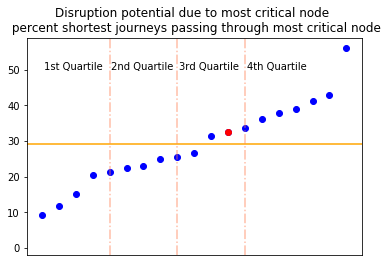

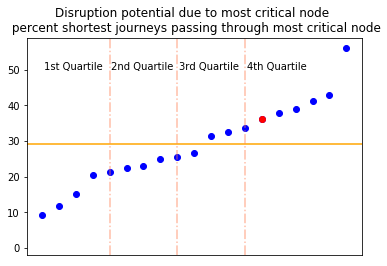

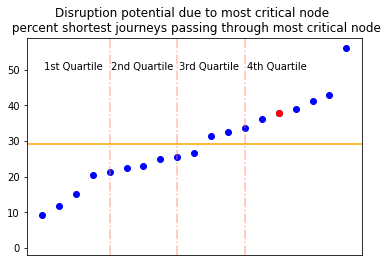

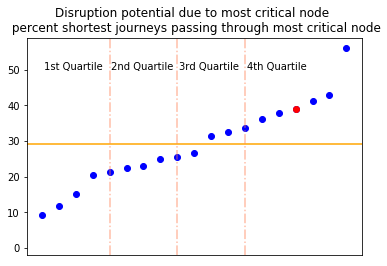

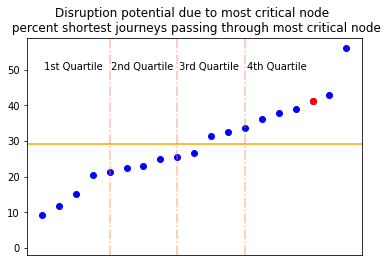

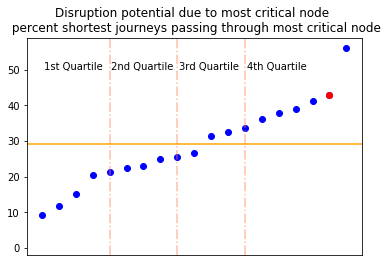

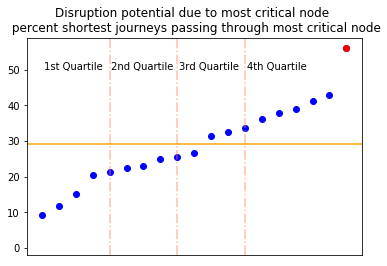

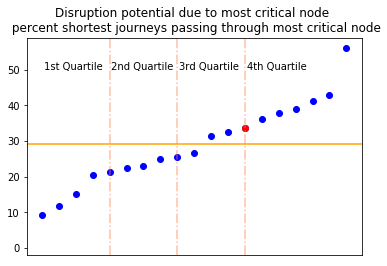

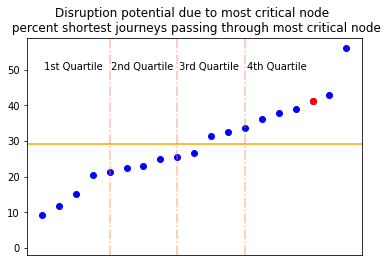

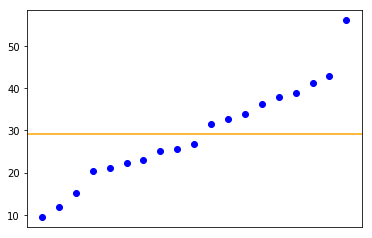

In [8]:
for i in city_scan_list:
    get_maxbc_plots(i)

### This function plots the graph and highlights the most critical node in the network.

In [72]:
def get_bc_graph_plots(place):
    
    string = place.split(',')[0]
    
    G = nx.read_gpickle("/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{a}/{b}".format(a=string, b=string))
    b = ox.basic_stats(G)
    
    #G_projected = ox.project_graph(G)
    node_lis = glob('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/nodes/nodes.shp'.format(string))
    extended_path_lis = glob('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/Extended_*.csv'.format(string))
    
    gdf_node = gpd.GeoDataFrame.from_file(node_lis[0])
    exten = pd.read_csv(extended_path_lis[0])
    exten= exten.rename(columns={'Unnamed: 0':'osmid'})
    exten['betweenness_centrality'] = exten['betweenness_centrality']*100
    
    max_node = exten[exten.betweenness_centrality == max(exten.betweenness_centrality)]['osmid'].values[0]
    max_bc = max(exten.betweenness_centrality)
    
    nc = ['r' if node==max_node else '#336699' for node in G.nodes()]
    ns = [80 if node==max_node else 8 for node in G.nodes()]
    
    print('{}: The most critical node has {:.2f}% of shortest journeys passing through it. \n'.format(place, max_bc))
    print('The road network of {} has {} nodes and {} edges \n\n'.format(string, b['n'], b['m']))
    fig, ax =  ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2, node_alpha=0.8, edge_alpha=0.8,
                            fig_height=8,fig_width=8)
    gdf_node[gdf_node.osmid ==  max_node].plot(ax=ax, color='red', zorder = 3)
    
    #ax.set_title('{}: {:.2f}% of shortest paths between all nodes \n in the network through this node'.format(string, max_bc), fontsize=15)
    
    

    print('\n\n\n')
    
    fig.savefig('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/{}_bc_graph_plot.png'.format(string, string))

El Nido, Philippines: The most critical node has 33.78% of shortest journeys passing through it. 

The road network of El Nido has 29 nodes and 78 edges 




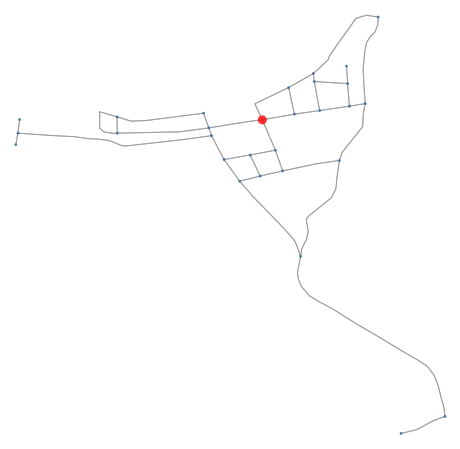

/nfshome/gb1877/.conda/envs/osmpython/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


Tashkent, Uzbekistan: The most critical node has 9.36% of shortest journeys passing through it. 

The road network of Tashkent has 14749 nodes and 37140 edges 




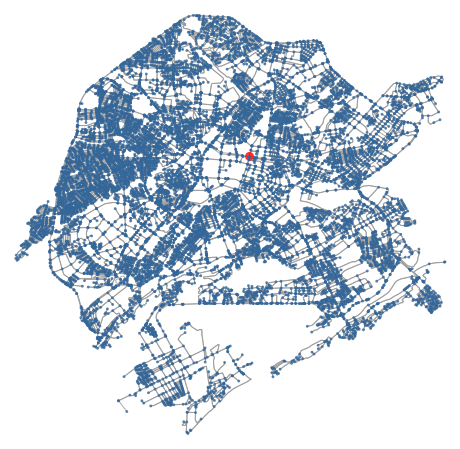





Montevideo, Uruguay: The most critical node has 11.89% of shortest journeys passing through it. 

The road network of Montevideo has 16929 nodes and 46855 edges 




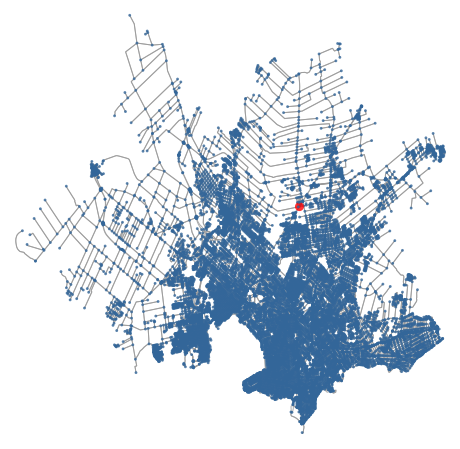





Monrovia, Liberia: The most critical node has 26.67% of shortest journeys passing through it. 

The road network of Monrovia has 5985 nodes and 14147 edges 




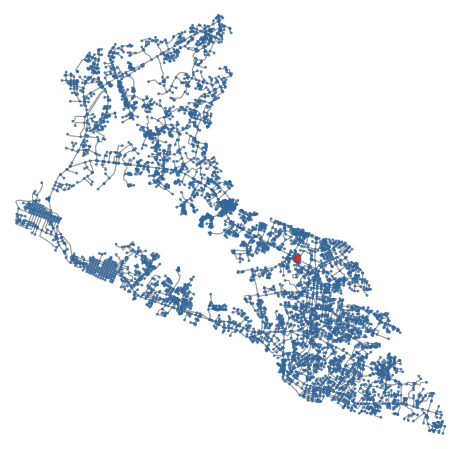





Sfax, Tunisia: The most critical node has 15.14% of shortest journeys passing through it. 

The road network of Sfax has 3807 nodes and 9780 edges 




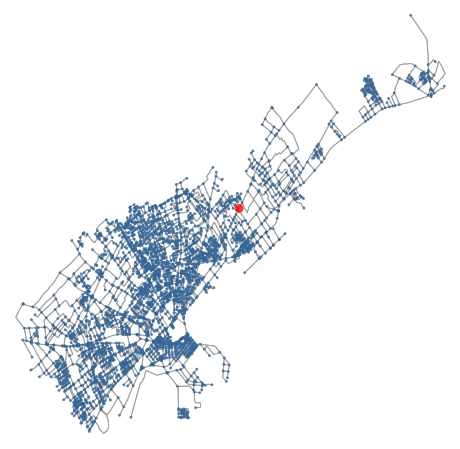





Lima, Peru: The most critical node has 20.45% of shortest journeys passing through it. 

The road network of Lima has 2456 nodes and 5643 edges 




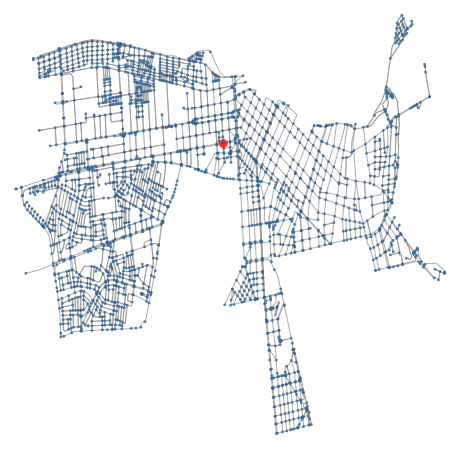





Penang, Malaysia: The most critical node has 21.19% of shortest journeys passing through it. 

The road network of Penang has 45047 nodes and 108057 edges 




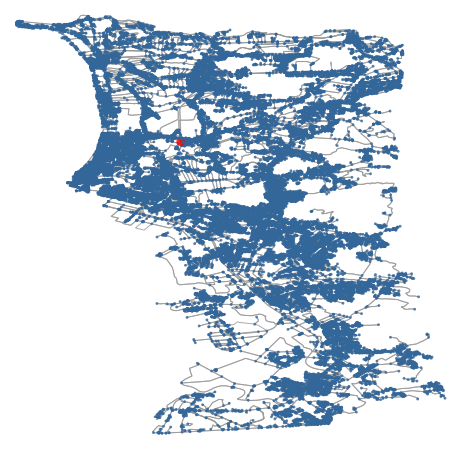





Cotonou, Benin: The most critical node has 22.32% of shortest journeys passing through it. 

The road network of Cotonou has 7377 nodes and 20944 edges 




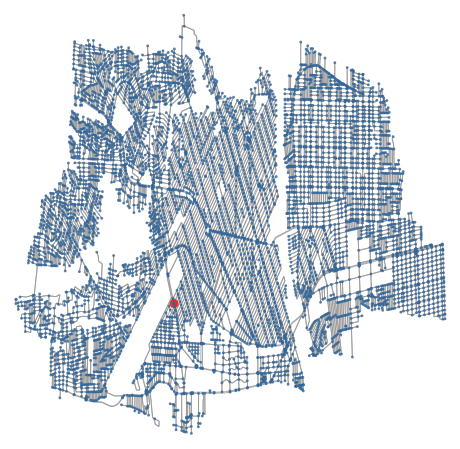





Osh,  Kyrgyzstan: The most critical node has 22.91% of shortest journeys passing through it. 

The road network of Osh has 4435 nodes and 11591 edges 




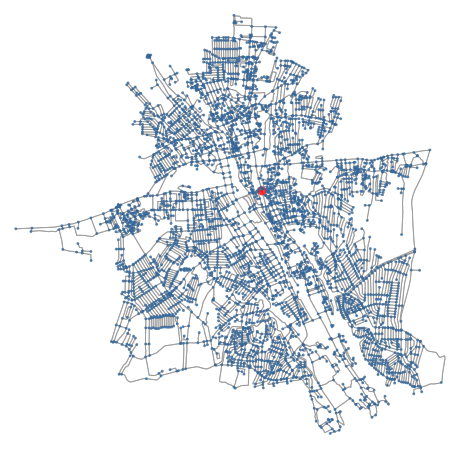





Maputo, Mozambique: The most critical node has 25.06% of shortest journeys passing through it. 

The road network of Maputo has 19330 nodes and 56445 edges 




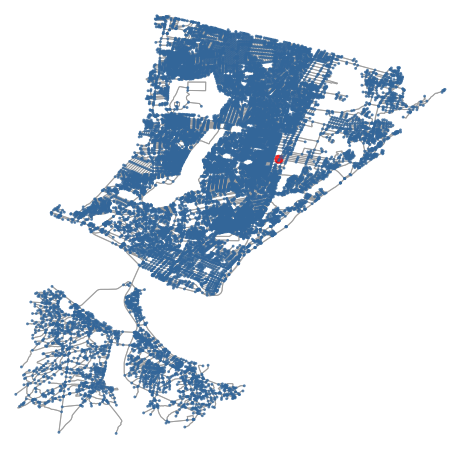





Batroun, Lebanon: The most critical node has 25.52% of shortest journeys passing through it. 

The road network of Batroun has 380 nodes and 939 edges 




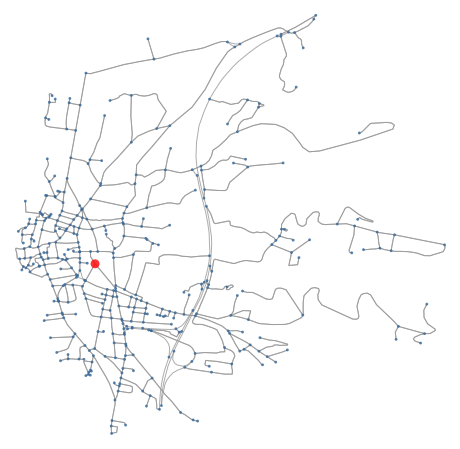





Davao City, Philippines: The most critical node has 31.50% of shortest journeys passing through it. 

The road network of Davao City has 19603 nodes and 52858 edges 




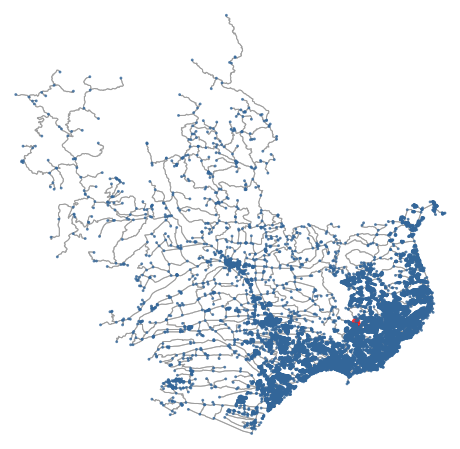





Vinh Long, Vietnam: The most critical node has 32.61% of shortest journeys passing through it. 

The road network of Vinh Long has 1761 nodes and 4348 edges 




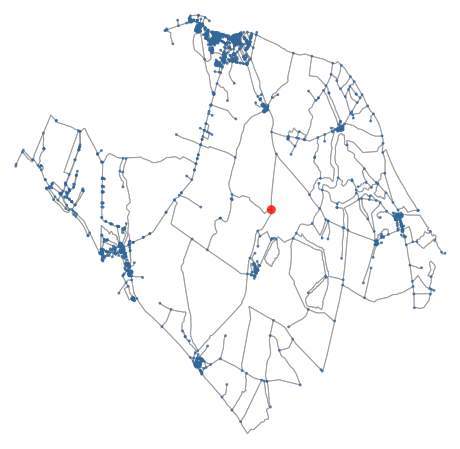





Sousse, Tunisia: The most critical node has 36.25% of shortest journeys passing through it. 

The road network of Sousse has 3964 nodes and 11043 edges 




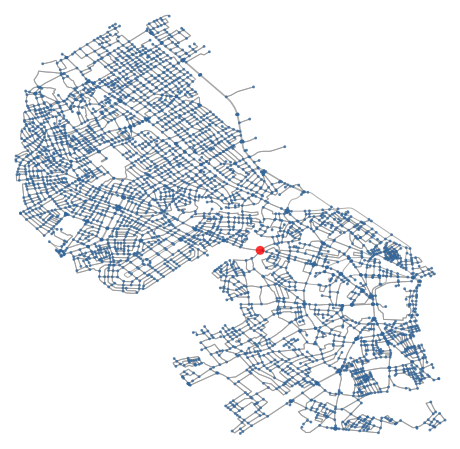





Khanh Hoa, Vietnam: The most critical node has 37.84% of shortest journeys passing through it. 

The road network of Khanh Hoa has 6677 nodes and 17296 edges 




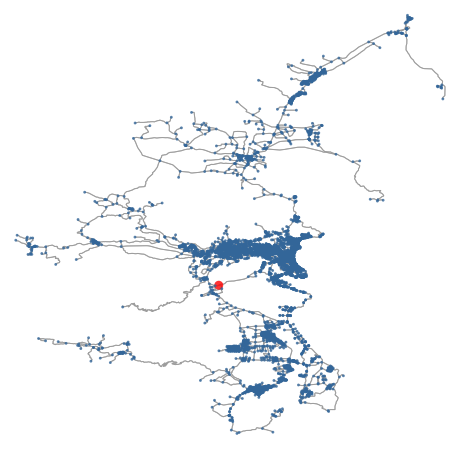





St. Louis, Senegal: The most critical node has 38.97% of shortest journeys passing through it. 

The road network of St. Louis has 5544 nodes and 16442 edges 




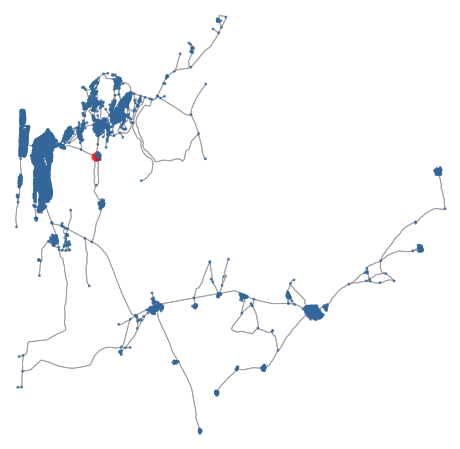





Coron, Philippines: The most critical node has 41.24% of shortest journeys passing through it. 

The road network of Coron has 548 nodes and 1356 edges 




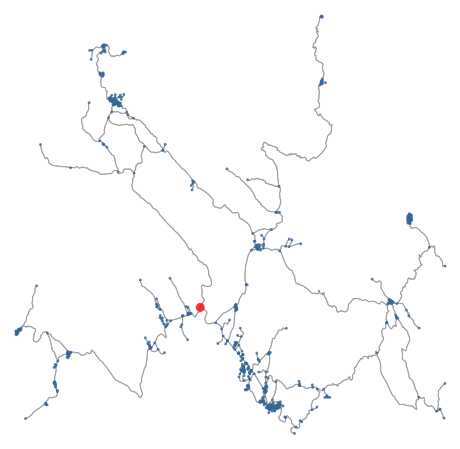





Joub Jannine, Lebanon: The most critical node has 42.98% of shortest journeys passing through it. 

The road network of Joub Jannine has 2208 nodes and 5772 edges 




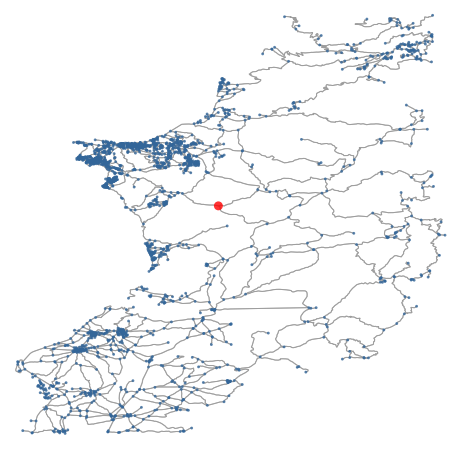





Cap-Haitien, Haiti: The most critical node has 56.22% of shortest journeys passing through it. 

The road network of Cap-Haitien has 1645 nodes and 4833 edges 




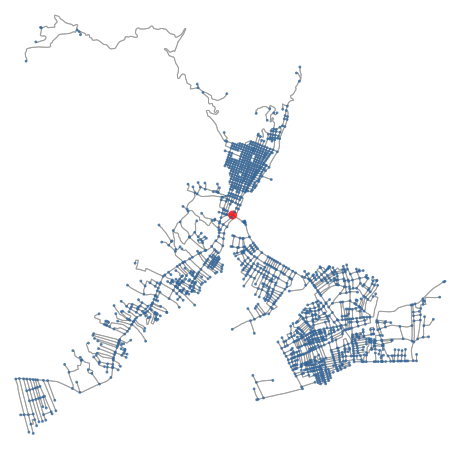





El Nido, Philippines: The most critical node has 33.78% of shortest journeys passing through it. 

The road network of El Nido has 29 nodes and 78 edges 




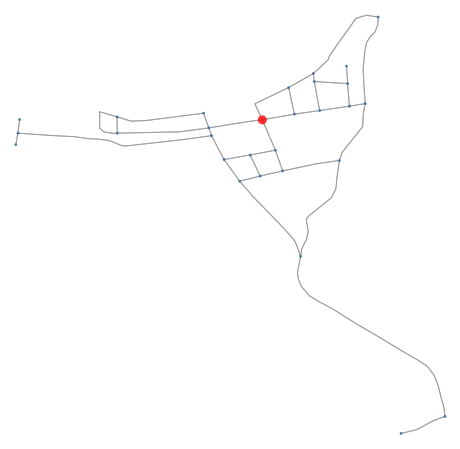





Coron, Philippines: The most critical node has 41.24% of shortest journeys passing through it. 

The road network of Coron has 548 nodes and 1356 edges 




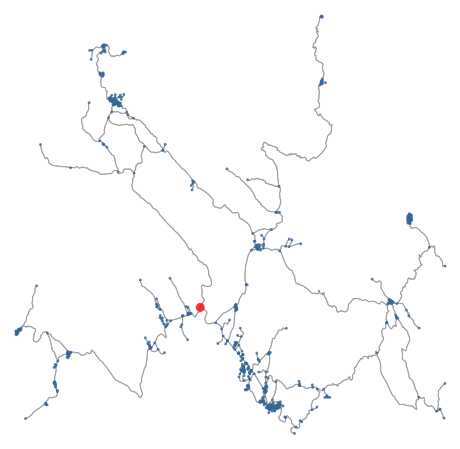

FileNotFoundError: [Errno 2] No such file or directory: '/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/Puerto Princesa/Puerto Princesa'

In [73]:
for i in city_scan_list:
    get_bc_graph_plots(i)

### The next function is to determine n most critical nodes in the road network for a city.

In [30]:
def top_n_nodes(place, percent):
    
    string = place.split(',')[0]
    
    G = nx.read_gpickle("/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{a}/{b}".format(a=string, b=string))
    b = ox.basic_stats(G)
    
    extended_path_lis = glob('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/Extended_*.csv'.format(string))
    
    exten = pd.read_csv(extended_path_lis[0])
    exten= exten.rename(columns={'Unnamed: 0':'osmid'})
    exten['betweenness_centrality'] = exten['betweenness_centrality']*100
    
    exten = exten[['osmid', 'betweenness_centrality', 'betweenness_centrality_avg']]
    exten.sort_values(by='betweenness_centrality', ascending=False, inplace=True)
    
    n_ = int((percent*len(exten))/100)
    
    if n_ > 0:
        n = n_
    else:
        n = 1
    
    max_node = exten[:n].osmid.tolist()
    
    max_bc = exten.betweenness_centrality[:n].tolist()

    nc = ['r' if node in max_node else '#336699' for node in G.nodes()]
    ns = [80 if node in max_node else 8 for node in G.nodes()]

    print('{}: The average of {} most critical node(s) has {:.2f}% of shortest journeys passing through it. \n'.format(place,n, np.average(max_bc)))
    #print('The road network of {} has {} nodes and {} edges \n\n'.format(string, b['n'], b['m']))
    fig, ax =  ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2, node_alpha=0.8, edge_alpha=0.8,
                            fig_height=8,fig_width=8)
    
    ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2, node_alpha=0.8, edge_alpha=0.8,
                            fig_height=8,fig_width=8)
    
    
    #ax.set_title('{}: The average of {} most critical node(s) \n has {:.2f}% of shortest journeys passing through them. \n'.format(place,n, np.average(max_bc)))
    
    print('\n\n\n')
    
    fig.savefig('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/{}_top_{}_plot.png'.format(string, string, n))
    
    
    

Montevideo, Uruguay: The average of 169 most critical node(s) has 6.55% of shortest journeys passing through it. 



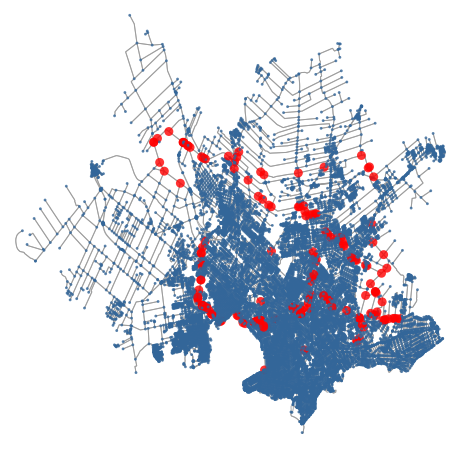

In [8]:
top_n_nodes('Montevideo, Uruguay', 1)

El Nido, Philippines: The average of 1 most critical node(s) has 33.78% of shortest journeys passing through it. 



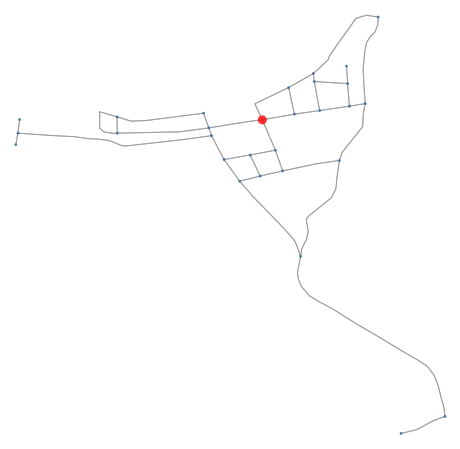





Tashkent, Uzbekistan: The average of 147 most critical node(s) has 6.03% of shortest journeys passing through it. 



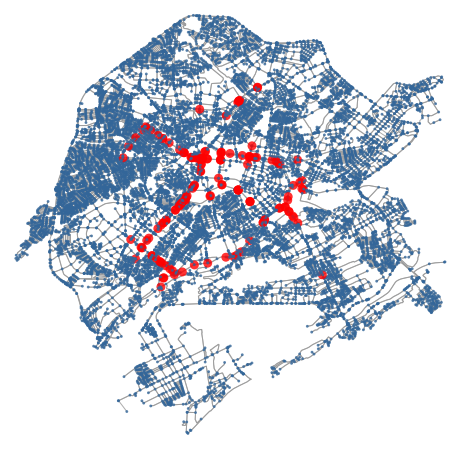





Montevideo, Uruguay: The average of 169 most critical node(s) has 6.55% of shortest journeys passing through it. 



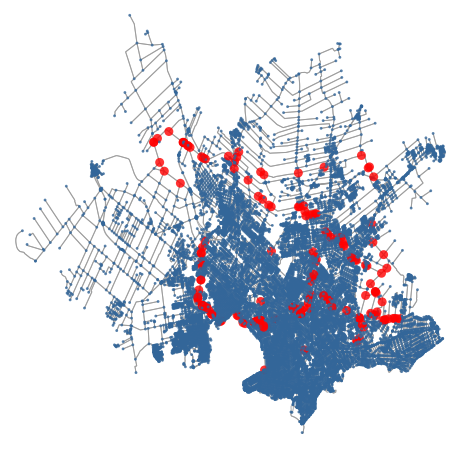





Monrovia, Liberia: The average of 59 most critical node(s) has 21.64% of shortest journeys passing through it. 



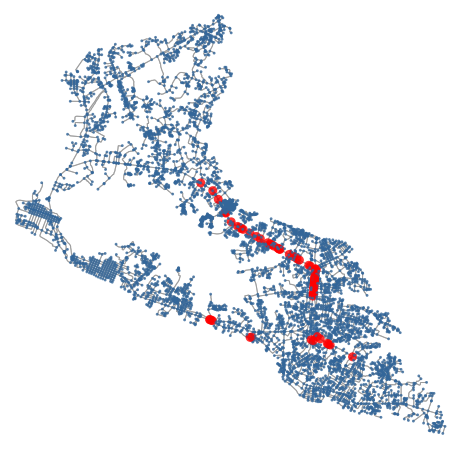





Sfax, Tunisia: The average of 38 most critical node(s) has 11.58% of shortest journeys passing through it. 



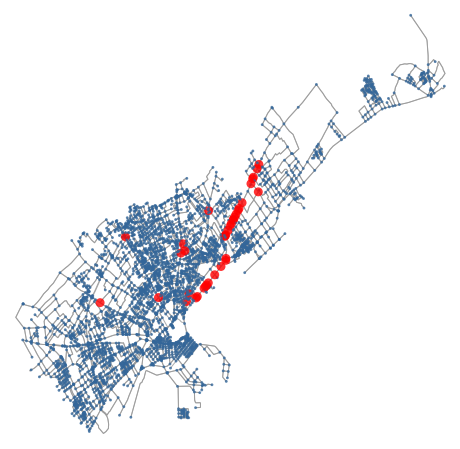





Lima, Peru: The average of 24 most critical node(s) has 16.73% of shortest journeys passing through it. 



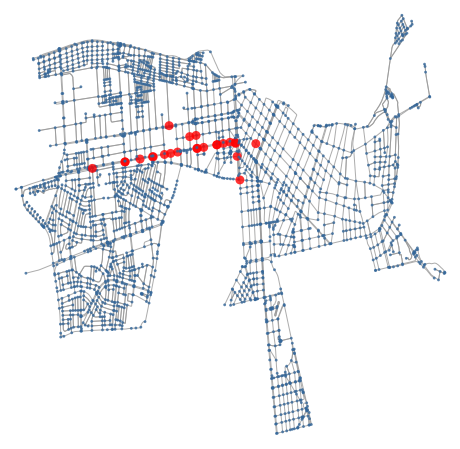





Penang, Malaysia: The average of 450 most critical node(s) has 6.63% of shortest journeys passing through it. 



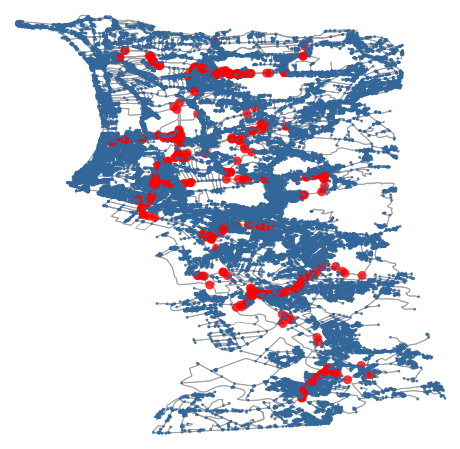





Cotonou, Benin: The average of 73 most critical node(s) has 12.74% of shortest journeys passing through it. 



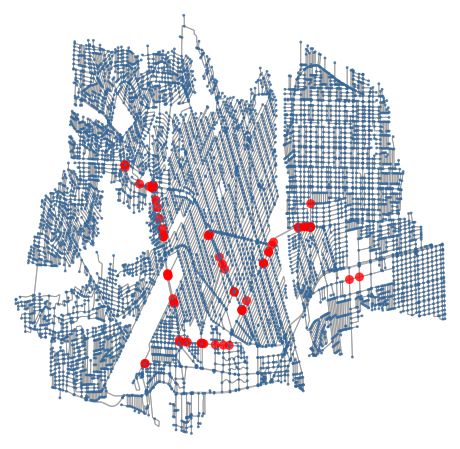





Osh,  Kyrgyzstan: The average of 44 most critical node(s) has 14.82% of shortest journeys passing through it. 



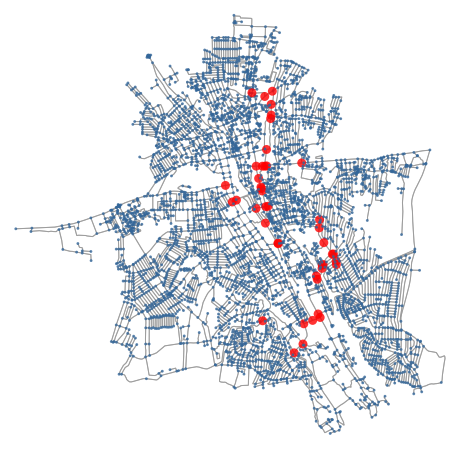





Maputo, Mozambique: The average of 193 most critical node(s) has 9.99% of shortest journeys passing through it. 



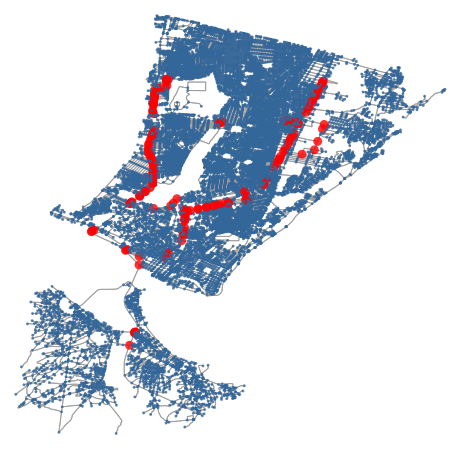





Batroun, Lebanon: The average of 3 most critical node(s) has 23.38% of shortest journeys passing through it. 



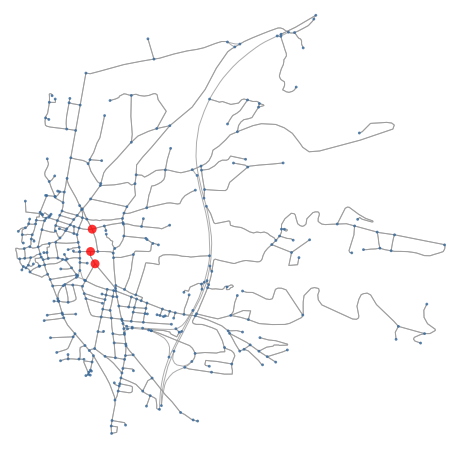





Davao City, Philippines: The average of 196 most critical node(s) has 11.46% of shortest journeys passing through it. 



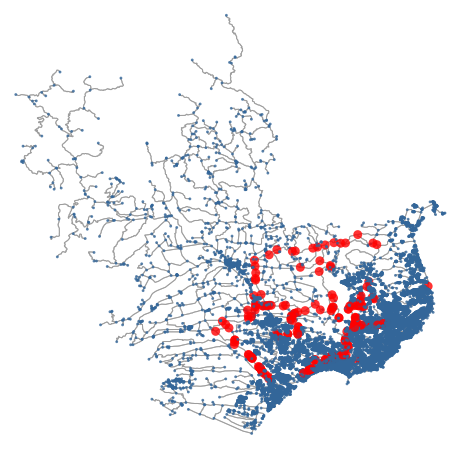





Vinh Long, Vietnam: The average of 17 most critical node(s) has 24.53% of shortest journeys passing through it. 



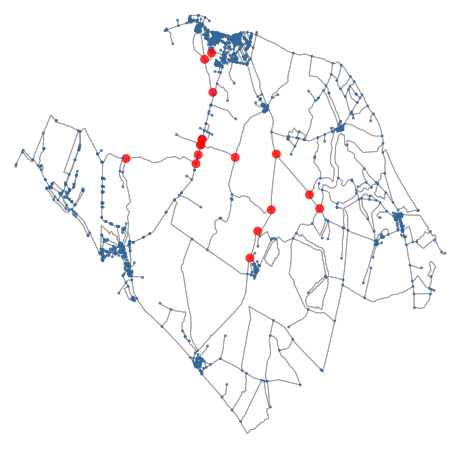





Sousse, Tunisia: The average of 39 most critical node(s) has 15.51% of shortest journeys passing through it. 



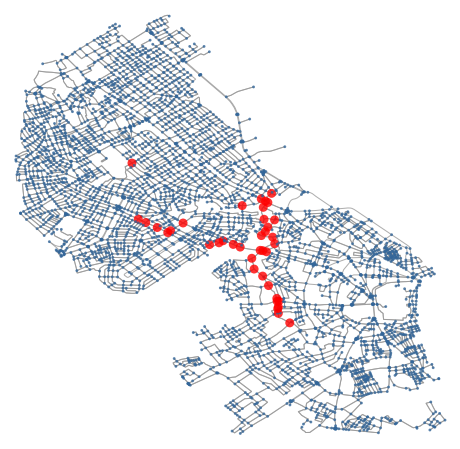





Khanh Hoa, Vietnam: The average of 66 most critical node(s) has 23.15% of shortest journeys passing through it. 



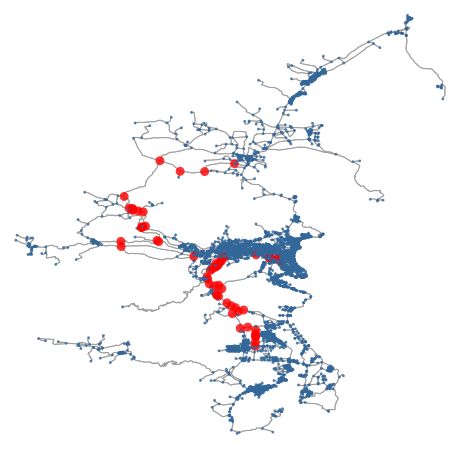





St. Louis, Senegal: The average of 55 most critical node(s) has 23.55% of shortest journeys passing through it. 



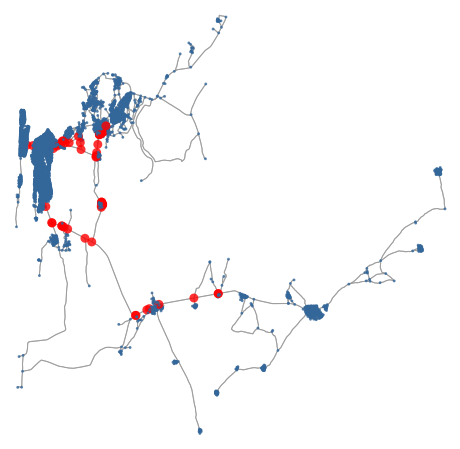





Coron, Philippines: The average of 5 most critical node(s) has 34.75% of shortest journeys passing through it. 



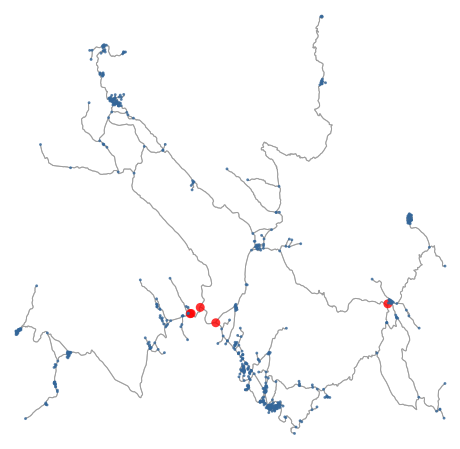





Joub Jannine, Lebanon: The average of 22 most critical node(s) has 29.61% of shortest journeys passing through it. 



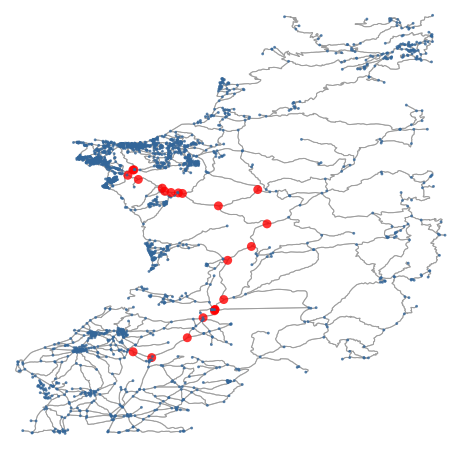





Cap-Haitien, Haiti: The average of 16 most critical node(s) has 48.84% of shortest journeys passing through it. 



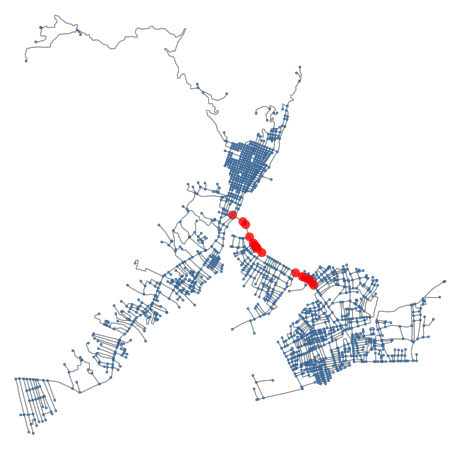





El Nido, Philippines: The average of 1 most critical node(s) has 33.78% of shortest journeys passing through it. 



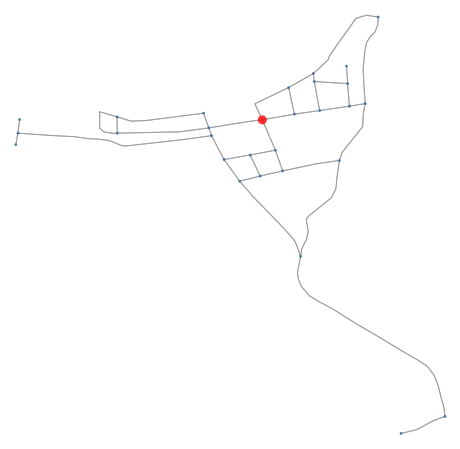





Coron, Philippines: The average of 5 most critical node(s) has 34.75% of shortest journeys passing through it. 



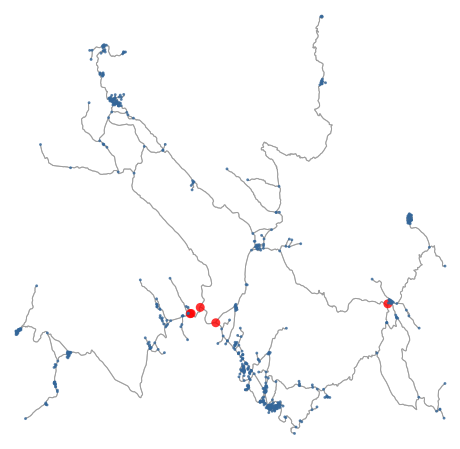

FileNotFoundError: [Errno 2] No such file or directory: '/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/Puerto Princesa/Puerto Princesa'

In [65]:
for i in city_scan_list:
    top_n_nodes(i, 1)

In [16]:
lis = ['El Nido, Philippines',
'Coron, Philippines',
'Puerto Princesa, Philippines']

El Nido, Philippines: The average of 1 most critical node(s) has 33.78% of shortest journeys passing through it. 



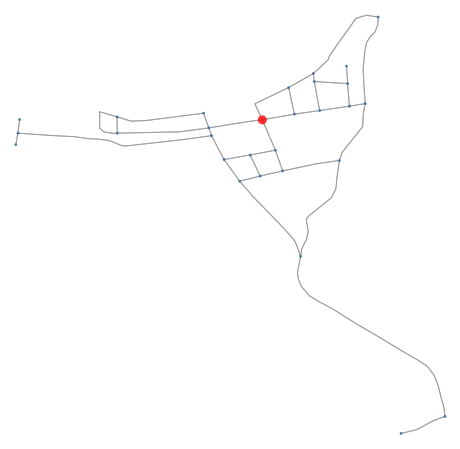





Coron, Philippines: The average of 5 most critical node(s) has 34.75% of shortest journeys passing through it. 



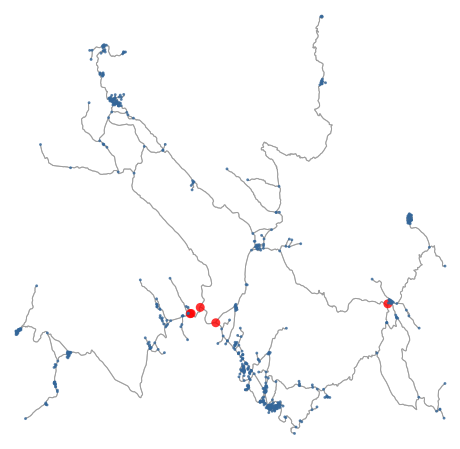

FileNotFoundError: [Errno 2] No such file or directory: '/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/Puerto Princesa/Puerto Princesa'

In [31]:
for i in lis:
    top_n_nodes(i, 1)

### Histograms

In [18]:
extended_path_lis = glob('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/*/Extended_*.csv')

In [19]:
d = pd.read_csv(extended_path_lis[1])

In [20]:
d.head()

Unnamed: 0  avg_neighbor_degree  avg_neighbor_degree_avg  \
0    31035109                  3.0                 2.363158   
1    31035110                  2.0                 2.363158   
2    31035112                  2.0                 2.363158   
3    31035113                  1.5                 2.363158   
4    31035116                  1.5                 2.363158   

   avg_weighted_neighbor_degree  avg_weighted_neighbor_degree_avg  \
0                      0.031672                          0.038477   
1                      0.026952                          0.038477   
2                      0.025261                          0.038477   
3                      0.016365                          0.038477   
4                      0.036880                          0.038477   

   degree_centrality  degree_centrality_avg  clustering_coefficient  \
0           0.001222               0.001872                     0.0   
1           0.001222               0.001872                     0.0   
2           0.001629               0.001872                     0.0   
3           0.001222               0.001872                     0.0   
4           0.001629               0.001872                     0.0   

   clustering_coefficient_avg  clustering_coefficient_weighted  \
0                    0.037676                              0.0   
1                    0.037676                              0.0   
2                    0.037676                              0.0   
3                    0.037676                              0.0   
4                    0.037676                              0.0   

   clustering_coefficient_weighted_avg  pagerank  pagerank_max_node  \
0                              0.00116  0.000410          525867127   
1                              0.00116  0.000097          525867127   
2                              0.00116  0.000383          525867127   
3                              0.00116  0.000090          525867127   
4                              0.00116  0.000190          525867127   

   pagerank_max  pagerank_min_node  pagerank_min  betweenness_centrality  \
0      0.001364         1356144879      0.000063                0.034991   
1      0.001364         1356144879      0.000063                0.004235   
2      0.001364         1356144879      0.000063                0.187237   
3      0.001364         1356144879      0.000063                0.184778   
4      0.001364         1356144879      0.000063                0.115828   

   betweenness_centrality_avg  
0                     0.01572  
1                     0.01572  
2                     0.01572  
3                     0.01572  
4                     0.01572

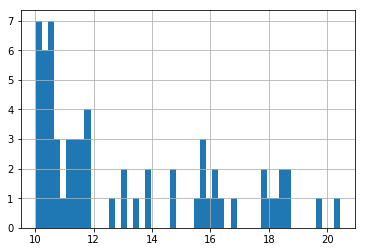

In [29]:
x = d.betweenness_centrality*100
x[x>10].hist(bins=50)

In [25]:
def get_histograms(place):
    
    string = place.split(',')[0]
    
    extended_path_lis = glob('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/Extended_*.csv'.format(string))
    
    d = pd.read_csv(extended_path_lis[0])
    
    fig = pl.figure(figsize=(6,4))
    
    ax = (d.betweenness_centrality*100).hist(bins=50)
    
    pl.title('Histogram of Betweenness Centraliity score for {}'.format(place))
    
    fig.savefig('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/{}_bc_hist.png'.format(string, string))

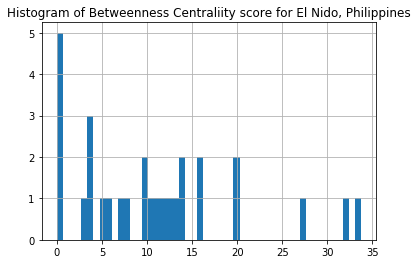

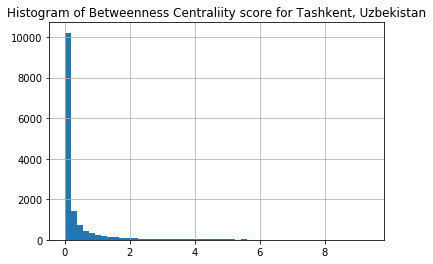

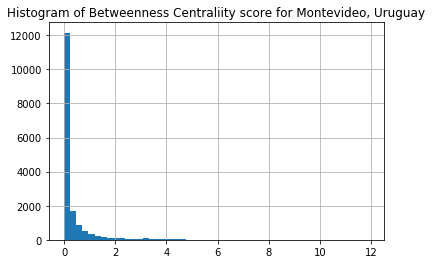

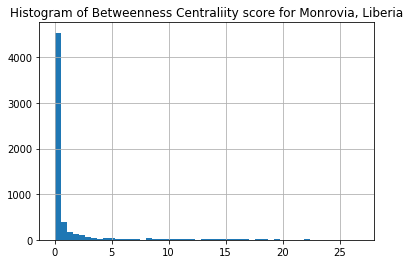

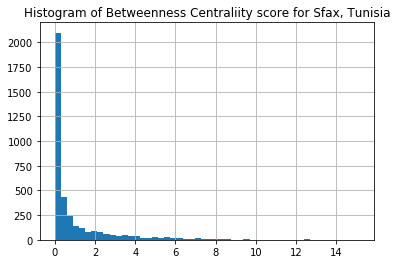

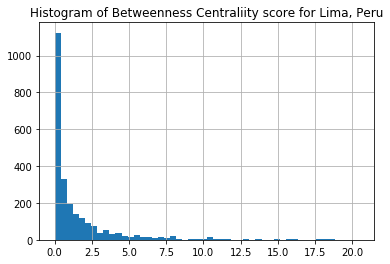

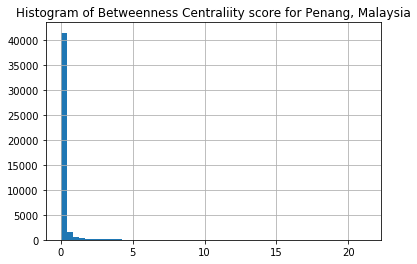

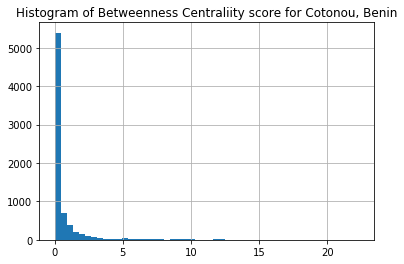

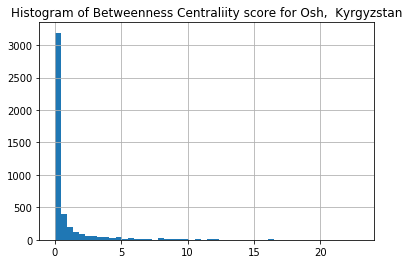

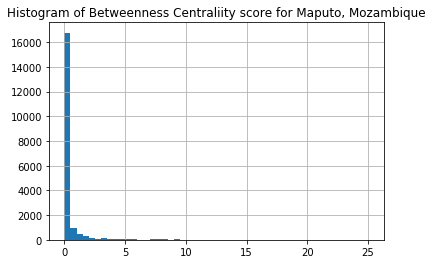

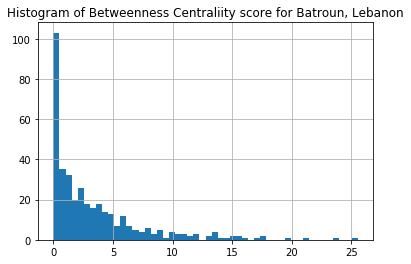

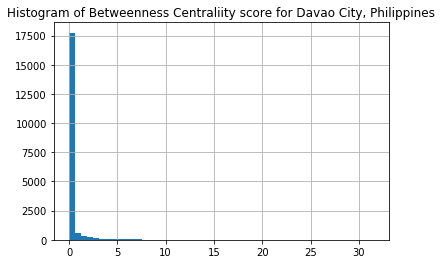

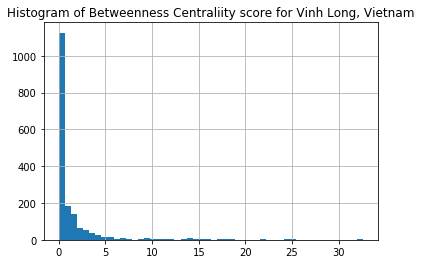

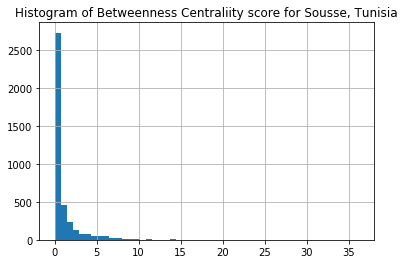

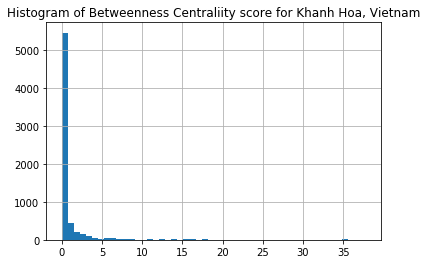

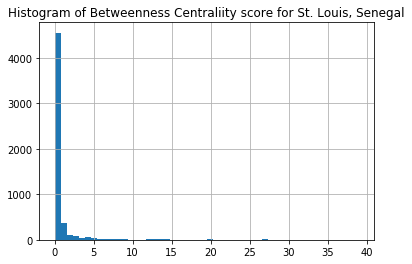

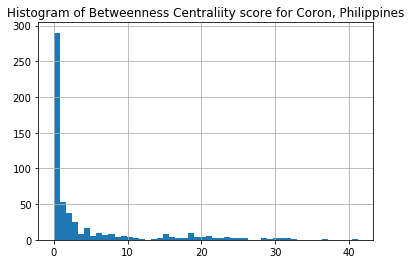

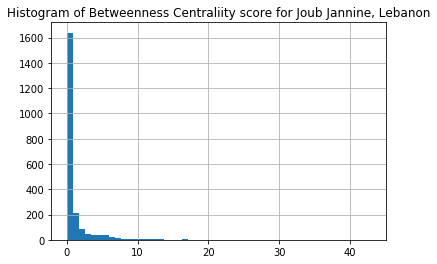

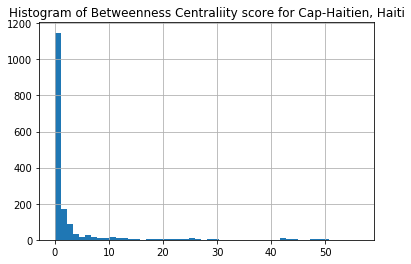

In [27]:
for i in city_scan_list:
    get_histograms(i)

In [19]:
def get_avg_maxbc_plots(place, percent, pAge=False):
    
    string = place.split(',')[0]
    extended_path_lis = glob('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/*/Extended_*.csv')
    
    max_d = {}
    for i in extended_path_lis:
        d = pd.read_csv(i)
        
        d= d.rename(columns={'Unnamed: 0':'osmid'})
        d['betweenness_centrality'] = d['betweenness_centrality']*100

        d = d[['osmid', 'betweenness_centrality', 'betweenness_centrality_avg']]
        d.sort_values(by='betweenness_centrality', ascending=False, inplace=True)
        
        if pAge:
            n_ = int((percent*len(d))/100)

            if n_ > 0:
                n = n_
            else:
                n = 1
        else:
            n = percent
        #d.betweenness_centrality = d.betweenness_centrality*100
        max_bc = d.betweenness_centrality[:n].tolist()
        city = i.split('/')[-2]
        max_d[city] = np.average(max_bc)
    
    del max_d['Province of Palawan']
    
    avg_max = np.average(list(max_d.values()))
    
    max_name = []
    max_val = []
    for w in sorted(max_d, key=max_d.get, reverse=False):
         max_name.append(w), max_val.append(max_d[w])
    
    fig = pl.figure(figsize=(6,4))
    ax = pl.plot( max_name,max_val, 'bo')
    pl.xticks('')
    pl.axhline(y=avg_max, color='orange', linestyle='-')
    #pl.ylabel('Maximum Betweenness Centrality', fontsize=12)
    #pl.text(x='Tashkent', y=avg_max+0.001, s='Average: {0:.3f}'.format(avg_max))
    #pl.xticks(rotation=60, fontsize=12)
    pl.plot( '{}'.format(string),max_d['{}'.format(string)], 'ro')
    #pl.text(x='{}'.format(string), y=max_d['{}'.format(string)]+0.001, s='{0:.3f}'.format(max_d['{}'.format(string)]))
    print(max_d['{}'.format(string)])
    x = np.arange(16)
    y = [0.7 for i in range(16)]
    pl.plot(x, y , alpha=0)
    pl.axvline(x=4, color='coral', alpha=0.5, linestyle='-.')
    pl.axvline(x=8, color='coral', alpha=0.5, linestyle='-.')
    pl.axvline(x=12, color='coral', alpha=0.5, linestyle='-.')
    pl.text(0.1, 31, '1st Quartile')
    pl.text(4.1, 31, '2nd Quartile')
    pl.text(8.1, 31, '3rd Quartile')
    pl.text(12.1, 31, '4th Quartile')
    
    pl.title('Criticality score (top {}% of most crucial nodes)'.format(percent))
    
    fig.savefig('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/{}_{}_avg_maxbc_plot.png'.format(string, string, n))

5.00354185352296


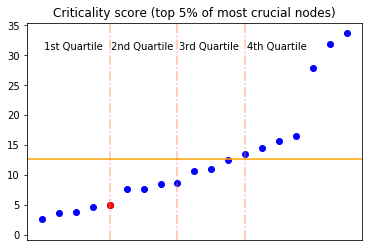

In [20]:
get_avg_maxbc_plots('Davao City', 5, True);

KeyError: 'Puerto Princesa'

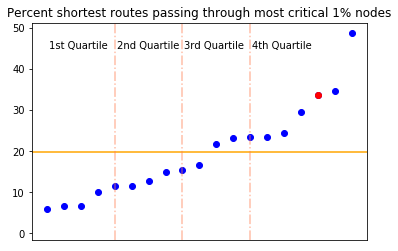

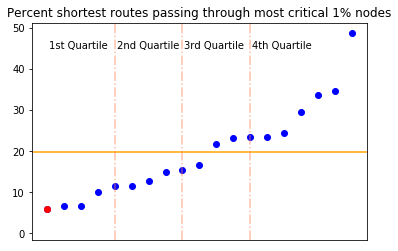

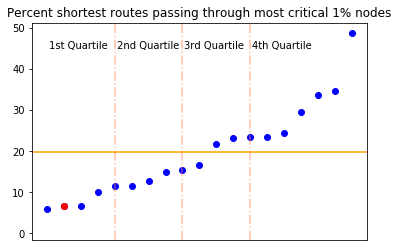

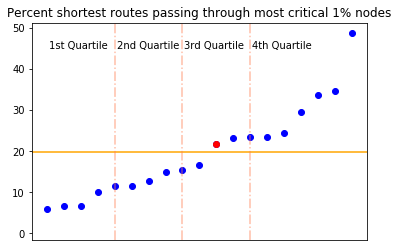

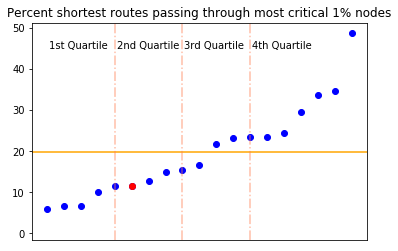

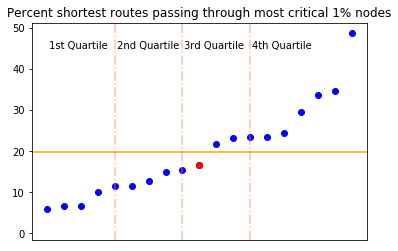

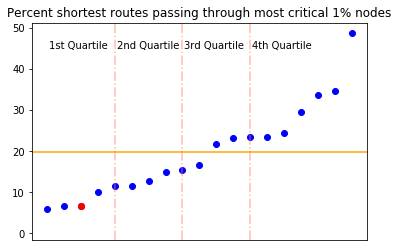

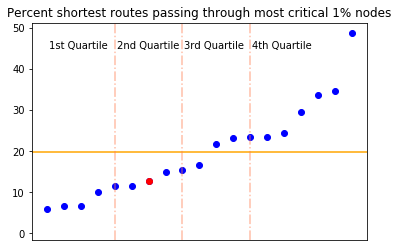

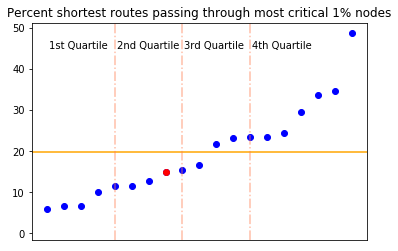

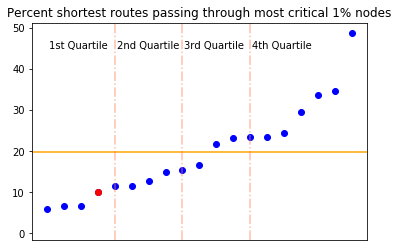

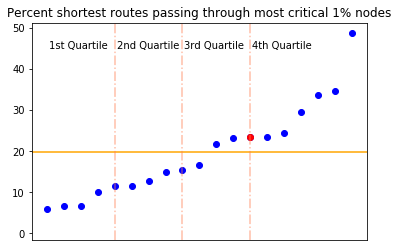

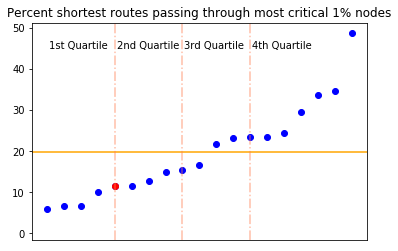

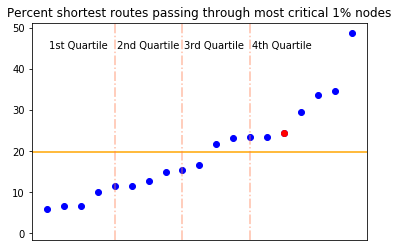

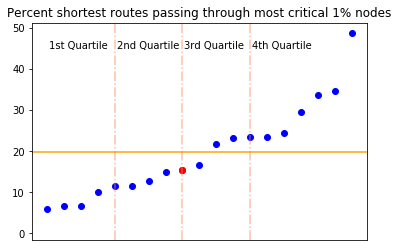

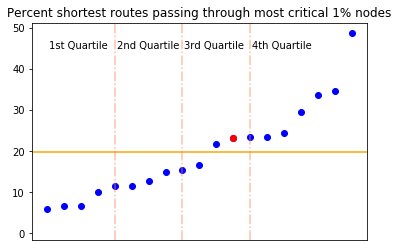

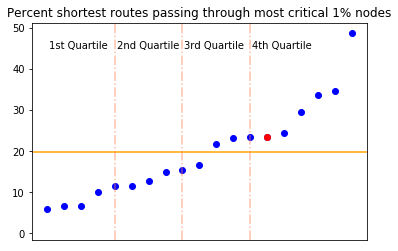

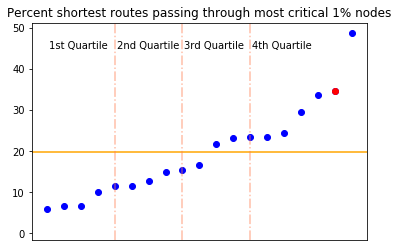

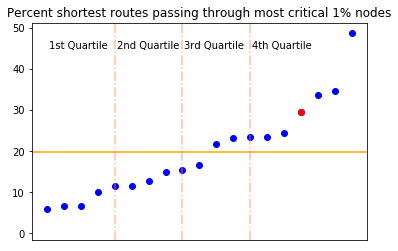

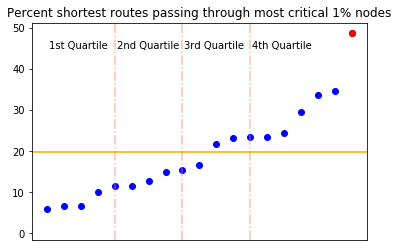

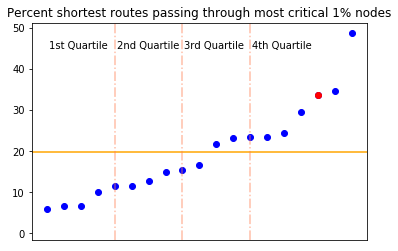

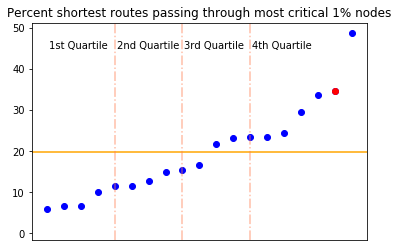

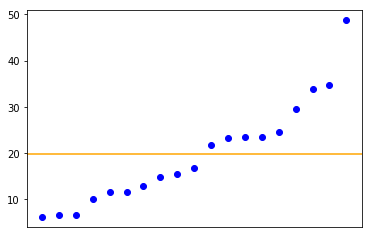

In [71]:
for i in city_scan_list:
    get_avg_maxbc_plots(i,1, True)

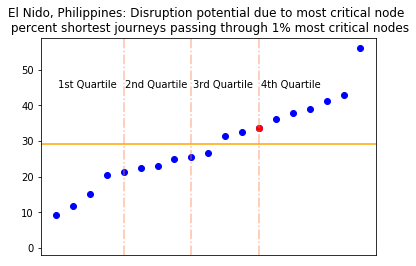

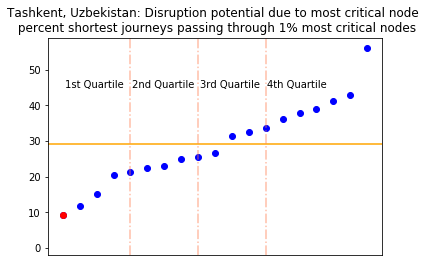

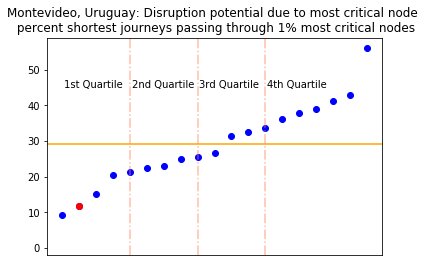

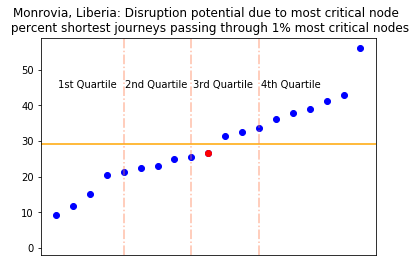

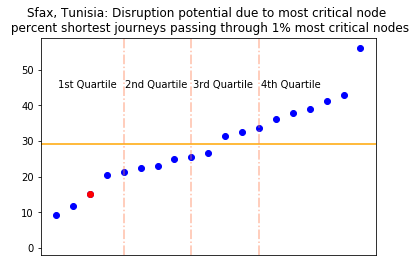

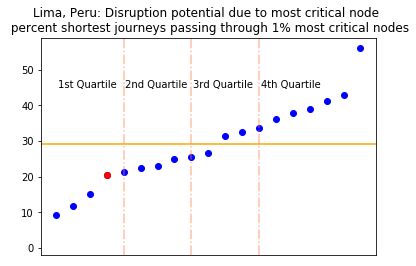

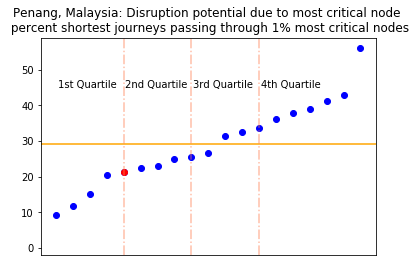

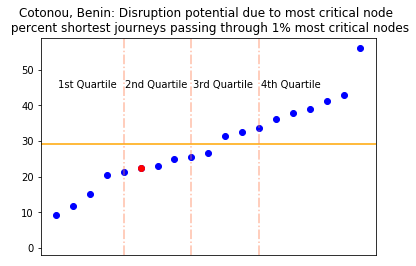

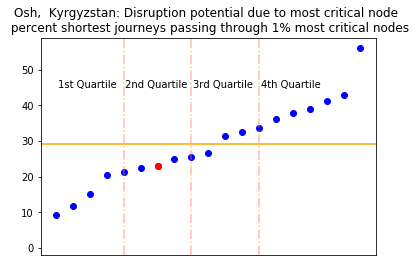

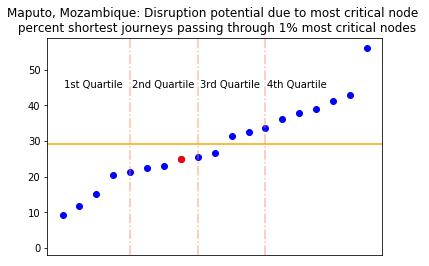

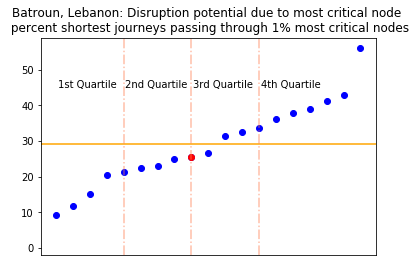

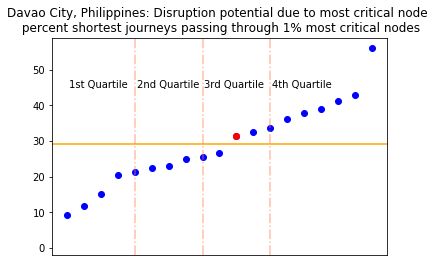

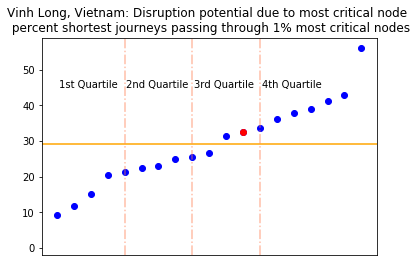

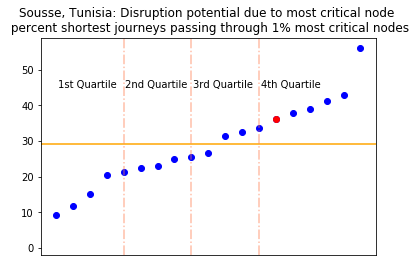

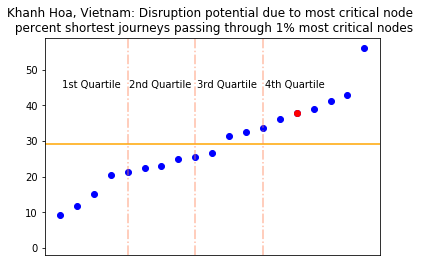

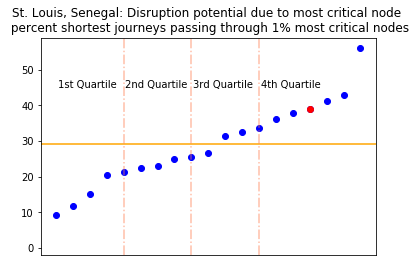

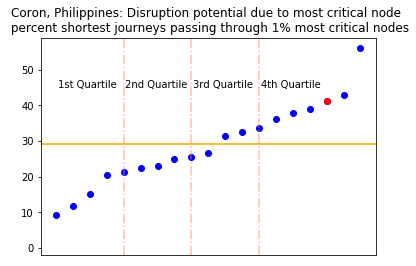

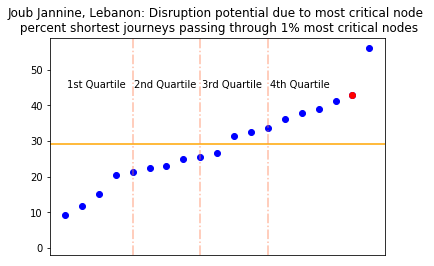

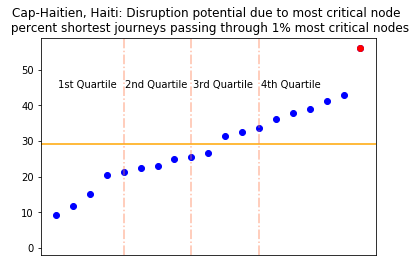

In [63]:
for i in city_scan_list:
    get_avg_maxbc_plots(i,1)

In [9]:
ox.geocode('Puerto Princesa, Philippines')

(9.95861725, 118.808355297654)

In [23]:
extended_path_lis = glob('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/*/Extended_*.csv')

In [24]:
extended_path_lis

['/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/Province of Palawan/Extended_Stats_Province of Palawan.csv',
 '/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/Lima/Extended_Stats_Lima.csv',
 '/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/Monrovia/Extended_Stats_Monrovia.csv',
 '/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/Montevideo/Extended_Stats_Montevideo.csv',
 '/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/Penang/Extended_Stats_Penang.csv',
 '/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/Sousse/Extended_Stats_Sousse.csv',
 '/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/Davao City/Extended_Stats_Davao City.csv',
 '/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/Osh/Extended_Stats_Osh.csv',
 '/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/Tashkent/Extended_Stats_Tashkent.csv',
 '/nfshome/gb1877/gb1877/WorldBank/CRP/Bet

In [25]:
city = []
for i in extended_path_lis:
    city.append(i.split('/')[-2])

In [26]:
city

['Province of Palawan',
 'Lima',
 'Monrovia',
 'Montevideo',
 'Penang',
 'Sousse',
 'Davao City',
 'Osh',
 'Tashkent',
 'Cotonou',
 'Coron',
 'Batroun',
 'Sfax',
 'Maputo',
 'El Nido',
 'Khanh Hoa',
 'Vinh Long',
 'Joub Jannine',
 'St. Louis',
 'Cap-Haitien']